In [1]:
import numpy as np 
import math
import pandas as pd

N = 1000

def RNRM2(m, sigma):
    n = 0
    M = N
    S = 0
    while n <= M:
        a = np.random.uniform(0, 1)
        S = S + a
        n += 1
    return m + sigma * (S - 0.5 * n) * (6 / math.sqrt(3 * n))
    
gfg = []
for i in range(N):
    gfg.append(RNRM2(0, 1))
    
M1 = sum(gfg)/N
t = 0
for x in gfg:
    t += (x - M1)**2
    
D1 = t/N

def RNRM1():
    r = np.random.uniform(0, 1)
    f = np.random.uniform(0, 1)
    z0 = math.cos(2 * math.pi * f) * math.sqrt(-2 * math.log(r))
    z1 = math.sin(2 * math.pi * f) * math.sqrt(-2 * math.log(r))
    return [z0, z1]

gfg = []
for i in range(N):
    vals = RNRM1()
    for v in vals:
        gfg.append(v)
    
M2 = sum(gfg)/(N*2)
t = 0
for x in gfg:
    t += (x - M2)**2
    
D2 = t/(N*2)

myTable = pd.DataFrame([["E(x)", M2, M1, 0.], ["V(x)", D2, D1, 1.0]], columns=["Момент", "RNRM1", "RNRM2", "Теоретическое значение"])
myTable

,Момент,RNRM1,RNRM2,Теоретическое значение
0,E(x),-0.004904,0.003250,0.0
1,V(x),0.937271,0.963632,1.0


In [3]:
import numpy as np 
import math
import pandas as pd

N = 10000

def RNEXP(b):
    u = np.random.uniform(0, 1)
    return -b * math.log(u)
    
gfg = []
for i in range(N):
    gfg.append(RNEXP(1))
    
M = sum(gfg)/N
t = 0
for x in gfg:
    t += (x - M)**2
    
D = t/N

myTable = pd.DataFrame([["E(x)", M, 1], ["V(x)", D, 1]], columns=["Момент", "RNEXP", "Теоретическое значение"])
myTable

,Момент,RNEXP,Теоретическое значение
0,E(x),0.994118,1
1,V(x),0.960591,1


In [5]:
import numpy as np 
import pandas as pd

N = 10000

def RNCHIS(n):
    res = 0
    for _ in range(n):
        u = np.random.normal(0, 1)
        res += u ** 2
    return res
    
gfg = []
for i in range(N):
    gfg.append(RNCHIS(10))
    
M = sum(gfg)/N
t = 0
for x in gfg:
    t += (x - M)**2
    
D = t/N

myTable = pd.DataFrame([["E(x)", M, 10], ["V(x)", D, 20]], columns=["Момент", "RNCHIS", "Теоретическое значение"])
myTable

,Момент,RNCHIS,Теоретическое значение
0,E(x),9.968500,10
1,V(x),19.439193,20


In [7]:
import numpy as np 
import math
import pandas as pd

N = 10000

def RNSTUD(n):
    z = np.random.normal(0, 1)
    Yn = np.random.chisquare(n)
    return z / math.sqrt(Yn / n)
    
gfg = []
for i in range(N):
    gfg.append(RNSTUD(10))
    
M = sum(gfg)/N
t = 0
for x in gfg:
    t += (x - M)**2
    
D = t/N

myTable = pd.DataFrame([["E(x)", M, abs(M), 0.0], ["V(x)", D, abs(D - 1.25), 1.25]], columns=["Момент", "RNSTUD", "Погрешность", "Теоретическое значение"])
myTable

,Момент,RNSTUD,Погрешность,Теоретическое значение
0,E(x),-0.005119,0.005119,0.00
1,V(x),1.256632,0.006632,1.25


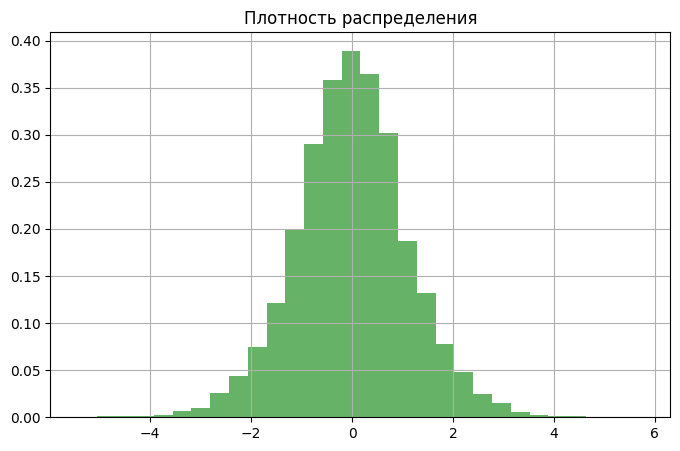

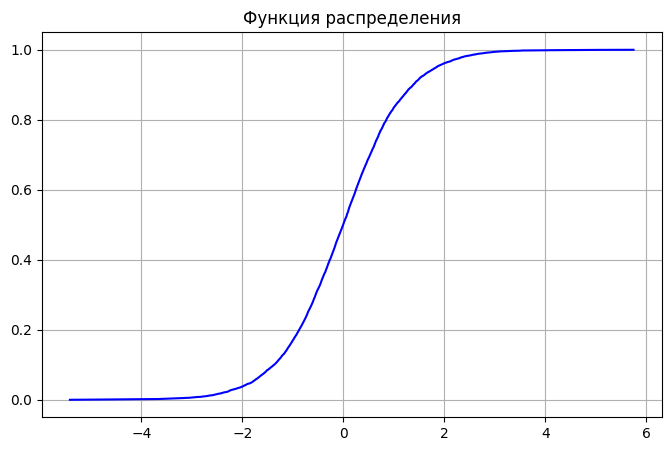

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = gfg

plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Плотность распределения')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sorted_data = np.sort(data)
y = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y, color='b')
plt.title('Функция распределения')
plt.grid(True)
plt.show()

In [16]:
import numpy as np
import math

def generate_random_normal_1():
    u1 = np.random.uniform(0, 1, 1)
    u2 = np.random.uniform(0, 1, 1)
    return math.sqrt(-2*math.log(u2))*math.cos(2*math.pi*u1)

def generate_random_normal_2():
    r = 0
    for i in range(0, 11):
        r += np.random.uniform(0, 1, 1)
    return r - 6

def generate_data_1(N):
    data = np.ndarray(shape=(N), dtype=float)
    for i in range(0, N):
        data[i] = generate_random_normal_1()
    return data

def generate_data_2(N):
    data = np.ndarray(shape=(N), dtype=float)
    for i in range(0, N):
        data[i] = generate_random_normal_2()
    return data

N = 20
q = 2
m = 3
generated_data = generate_data_1(N)
transformed_data = np.asarray(list(map(lambda x: x * q + m, generated_data)))
mean = np.sum(transformed_data) / len(transformed_data)
variance = np.sum((transformed_data - mean) ** 2) / (len(transformed_data) - 1)
t_value = 1.7291
confidence_interval_lower = mean - math.sqrt(8) / math.sqrt(N)
confidence_interval_upper = mean + t_value * math.sqrt(variance) / math.sqrt(N)
print("Доверительный интервал:", confidence_interval_lower, mean, confidence_interval_upper)

Доверительный интервал: 2.3602871185896994 2.9927426506233754 3.6223737225571604


/var/folders/9h/0tm9r2p56yj135vgt1pjy4m80000gn/T/ipykernel_83706/3826103705.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(-2*math.log(u2))*math.cos(2*math.pi*u1)
